# 1. 准备数据

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [86]:
np.random.seed(0)
# 生成均值为0,标准差为1的随机数
X = np.random.normal(0,1,size=(200,2))
# 根据条件生成标签，若 (X[:,0]**2) + (X[:,1]**2) < 2 则为 1，否则为 0
y = np.array((X[:,0]**2)+(X[:,1]**2)<2, dtype='int')
y

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 233, stratify = y)

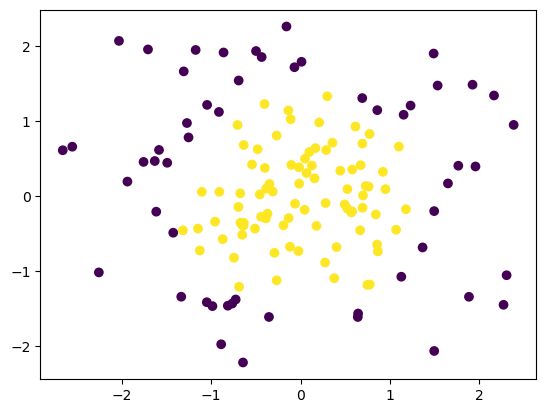

In [88]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

# 2. 多项式逻辑回归

## 2.1. 先使用线性逻辑回归看下效果

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [91]:
clf.score(x_train, y_train)

0.7071428571428572

In [92]:
# clf.score(x_test, y_test)

可以看到效果很差

## 2.2 使用多项式逻辑回归求解

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
# 创建一个PolynomialFeatures对象，用于生成多项式和交互特征
# degree=2 表示生成最高二次项的多项式特征
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)

PolynomialFeatures()

In [ ]:
# 使用多项式特征生成器对原始特征X进行变换，生成多项式特征矩阵
# 变换后每一行包含 [1, x, x^2]，即常数项、一次项和二次项
x2 = poly.transform(x_train)
x2t = poly.transform(x_test)

In [97]:
clf.fit(x2, y_train)

LogisticRegression()

In [98]:
clf.score(x2, y_train)

1.0

In [99]:
clf.score(x2t, y_test)

0.9666666666666667

# 3. 多分类OVR和OVO代码实现

In [100]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

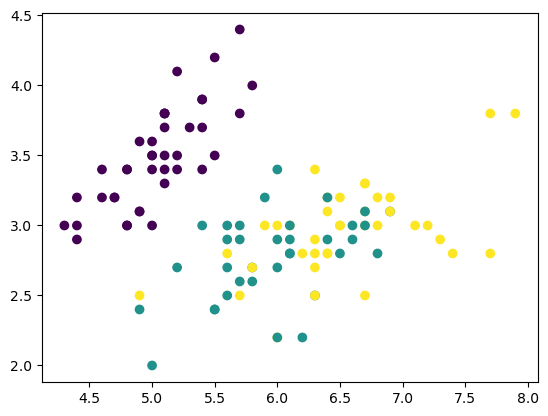

In [101]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

In [102]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(clf)
ovr.fit(x_train,y_train)
ovr.score(x_test, y_test)

0.9736842105263158

In [103]:
from sklearn.multiclass import OneVsOneClassifier

ovr = OneVsOneClassifier(clf)
ovr.fit(x_train,y_train)
ovr.score(x_test, y_test)

1.0